In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
train_data=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_data=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [4]:
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [5]:
print(train_data.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [6]:
X_train=train_data.drop('label', axis=1)
y_train=train_data['label']

X_test=test_data.drop('label', axis=1)
y_test=test_data['label']

In [7]:
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))

In [8]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

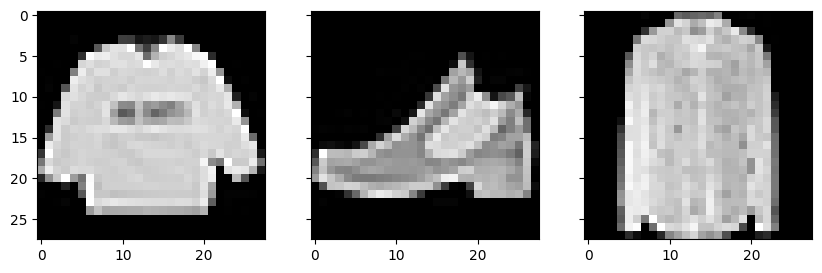

In [10]:
fig, axs= plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10, 5))
for i in range(0, 3):
    axs[i].imshow(X_train[i].reshape(28,28,1), cmap='gray')
plt.show()

In [59]:
model= Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history=model.fit(X_train, y_train,
           epochs=100, batch_size=32, validation_split=0.2,
           callbacks= [monitor_val_acc])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.7927 - loss: 0.5782 - val_accuracy: 0.8694 - val_loss: 0.3679
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.8859 - loss: 0.3077 - val_accuracy: 0.8585 - val_loss: 0.3974
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.8994 - loss: 0.2695 - val_accuracy: 0.8939 - val_loss: 0.2914
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9110 - loss: 0.2382 - val_accuracy: 0.8955 - val_loss: 0.2858
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9227 - loss: 0.2093 - val_accuracy: 0.8962 - val_loss: 0.2827
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9290 - loss: 0.1913 - val_accuracy: 0.9082 - val_loss: 0.2673
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9377 - loss: 0.1680 - val_accuracy: 0.9116 - val_loss: 0.2562
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 

In [63]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (32, 26, 26, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 13, 13, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (32, 11, 11, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (32, 11, 11, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (32, 9, 9, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 4, 4, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (32, 2, 2, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (32, 2, 2, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,856 (1.67 MB)

 Trainable params: 145,866 (569.79 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 291,734 (1.11 MB)

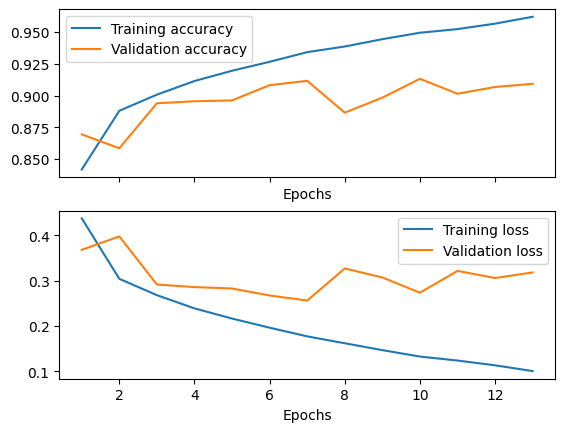

In [64]:
epochs = range(1, len(history.history['accuracy']) + 1)
fig,axs=plt.subplots(nrows=2, ncols=1, sharex=True)
axs[0].plot(epochs, history.history['accuracy'], label='Training accuracy')
axs[0].plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
axs[1].plot(epochs, history.history['loss'], label='Training loss')
axs[1].plot(epochs, history.history['val_loss'], label='Validation loss')
for ax in axs:
    ax.set_xlabel('Epochs')
    ax.legend(loc='best')
plt.show()

In [65]:
test_loss, test_accuracy= model.evaluate(X_test, y_test)
print(f'Test accuracy is {test_accuracy}')
print(f'Test loss is: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9104 - loss: 0.2745
Test accuracy is 0.9158999919891357
Test loss is: 0.26048219203948975


In [67]:
y_pred= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [72]:
print(y_pred)
y_pred=y_pred.argmax(axis=1)
print(y_pred)

[[9.96362031e-01 1.50220184e-10 8.59648208e-06 ... 2.81444840e-10
  1.17968064e-07 5.51886870e-10]
 [8.36230474e-10 9.99999940e-01 7.91094634e-10 ... 4.63622806e-15
  1.59148184e-09 1.36537483e-13]
 [3.80016454e-02 2.09614903e-08 9.52702105e-01 ... 2.36597103e-07
  1.71981043e-07 2.50114485e-09]
 ...
 [1.30523825e-12 4.56719710e-19 4.93143277e-17 ... 1.13528588e-11
  9.99999940e-01 2.74149112e-13]
 [1.17049261e-03 3.47143498e-07 5.81357635e-05 ... 2.32174966e-06
  9.97650862e-01 1.86207675e-04]
 [2.96616367e-08 9.99981821e-01 2.86723150e-07 ... 1.82450097e-10
  5.25600683e-07 1.07277749e-10]]
[0 1 2 ... 8 8 1]


In [74]:
y_pred= to_categorical(y_pred, num_classes=10)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.98      0.99      0.99      1000
           2       0.84      0.90      0.87      1000
           3       0.91      0.93      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.83      0.69      0.75      1000
           7       0.97      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000
 samples avg       0.92      0.92      0.92     10000

